In [1]:
from __future__ import print_function

In [2]:
#data handling/prediction
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

import os

#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [3]:
testdata = pd.read_csv("/Users/christianjacobrenfro/Desktop/Kaggle/Titanic/test.csv")

In [4]:
traindata = pd.read_csv("/Users/christianjacobrenfro/Desktop/Kaggle/Titanic/train.csv")

Lets upload our data into a dataframe

In [5]:
train = pd.DataFrame(traindata, columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
y = train.Survived

Lets get to understand our data set a little...

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S     

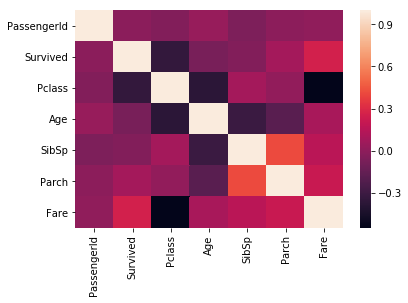

In [8]:
sns.heatmap(train.corr())
print(train.head(), train.corr())

it has some missing values - lets go ahead and fill those in with the average outcomes for both age and embarked

In [9]:
# first lets fill our null values
train.Embarked.fillna("S")
age_avg = train.Age.mean()
train['Age'] = train.Age.fillna(age_avg, axis=0)

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Awesome, no null values!  Next, turn some of our categorical variables into dummies and merge the dummies back into the dataframe...



In [12]:
#create dummies for categoricals
sex_dummies = pd.get_dummies(train.Sex).astype(int)
sex_dummies = sex_dummies[["male"]]
embarked_dummies = pd.get_dummies(train.Embarked).astype(int)
embarked_dummies = embarked_dummies[['S', 'C']]

Next lets remove redundant columns and object types, as well as information which we may not be able to understand (yet) e.g. Name, Ticket, Cabin

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train_x = train
train_x.drop("Sex", inplace=True, axis=1)
train_x.drop("Ticket", inplace=True, axis=1)
train_x.drop("Cabin", inplace=True, axis=1)
train_x.drop("Embarked", inplace=True, axis=1)
train_x.drop("Name", inplace=True, axis=1)
train_x.drop("Survived", inplace=True, axis=1)
train_x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


Now lets scale our numeric values and connect our dummies

In [15]:
#get numeric columns and scale them
numeric_columns = train_x.columns[1:]
X_numeric = train_x[numeric_columns]
X_numeric[numeric_columns] = StandardScaler().fit_transform(X_numeric)

#concatenate
train_x = pd.concat(
    [X_numeric, sex_dummies, embarked_dummies],
    axis=1)

/Users/christianjacobrenfro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/christianjacobrenfro/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
train_x.head()

,Pclass,Age,SibSp,Parch,Fare,male,S,C
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,1,1,0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,0,0,1
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,0,1,0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,0,1,0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,1,1,0


Alrighty, we have our X and y, lets go ahead and fit that into our random forest regressor

In [17]:
X = train_x[train_x.columns.tolist()[:-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

lr = LogisticRegression(C=1e9)
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)

print("Test set accuracy of LR model: ",metrics.accuracy_score(y_test, y_test_pred))


Test set accuracy of LR model:  0.772388059701


In [18]:
rf = RandomForestClassifier(n_estimators=50) #random forest with 50 trees

#train/test split with 10% of data in each split:
for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1)
    rf_fit = rf.fit(X_train,y_train)
    print("Accuracy for split ",i,": ",metrics.accuracy_score(y_test,rf_fit.predict(X_test)))

#compute cross-validation score accuracy across 10 folds
cross_val_scores = cross_val_score(rf,X,y,cv=10)

print("10-fold accuracies:\n",cross_val_scores)
print("Mean cv-accuracy:",np.mean(cross_val_scores))
print("Std of cv-accuracy:",np.std(cross_val_scores))

Accuracy for split  0 :  0.822222222222
Accuracy for split  1 :  0.777777777778
Accuracy for split  2 :  0.711111111111
Accuracy for split  3 :  0.855555555556
Accuracy for split  4 :  0.766666666667
Accuracy for split  5 :  0.866666666667
Accuracy for split  6 :  0.8
Accuracy for split  7 :  0.811111111111
Accuracy for split  8 :  0.833333333333
Accuracy for split  9 :  0.811111111111
10-fold accuracies:
 [ 0.71111111  0.77777778  0.74157303  0.83146067  0.91011236  0.83146067
  0.82022472  0.76404494  0.84269663  0.85227273]
Mean cv-accuracy: 0.808273464987
Std of cv-accuracy: 0.0561122046819


In [19]:
mean_squared_errors = np.abs(cross_val_score(lr,X,y,cv=50,scoring='neg_mean_squared_error'))
root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
print("50-fold mean RMSE: ", np.mean(root_mean_squared_errors))

50-fold mean RMSE:  0.436912161569


In [20]:
# compute null accuracy manually
print("Null accuracy on the test set: ",y_test.mean())

Null accuracy on the test set:  0.4111111111111111


In [21]:
model = RandomForestRegressor(n_estimators=100, 
                              oob_score=True, random_state=42)
model.fit(train_x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [22]:
model.oob_score_

0.40930166617180186

thats not a great score, but we may be able to do better..? Let's understand the importances of the variables we chose:

In [23]:
best_single_tree = DecisionTreeRegressor(max_depth=3, random_state=1)
best_single_tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [24]:
feature_names_cem = X.columns.tolist()
imp = pd.DataFrame({'feature':feature_names_cem, 'importance':best_single_tree.feature_importances_})
imp.sort_values(by='importance', ascending=False)

,feature,importance
5,male,0.628880
0,Pclass,0.213525
1,Age,0.061867
4,Fare,0.050802
2,SibSp,0.044927
3,Parch,0.000000
6,S,0.000000


In [25]:
surv_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
surv_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

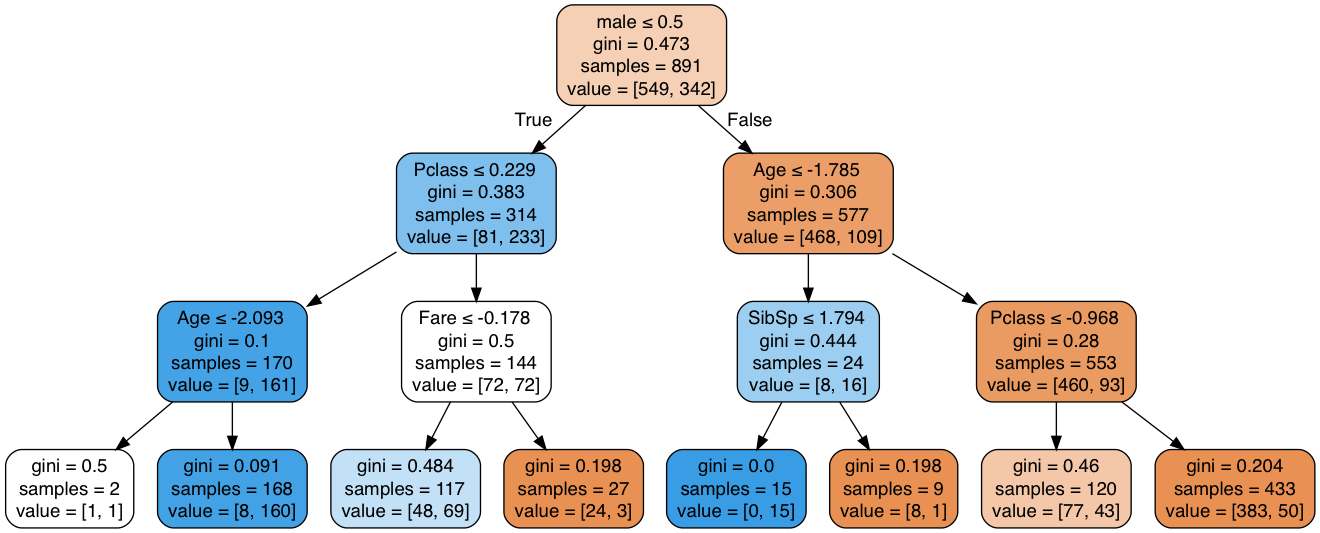

In [26]:
dot_data_surv = StringIO()
export_graphviz(
    surv_tree,
    out_file=dot_data_surv,
    feature_names=X.columns.tolist(),
    filled=True,
    rounded=True,
    special_characters=True)

surv_graph = pydotplus.graph_from_dot_data(dot_data_surv.getvalue())
Image(surv_graph.create_png())